ML ZOOMCAMP
WEEK 2
HOUSING PRICES

In [159]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [160]:
#Dataset HOUSING

df=pd.read_csv("housing.csv")
df.head()

#The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [161]:
df_1=df[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population",
         "households","median_income","median_house_value"]]

df_1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [162]:
df_1.dtypes #all parameters are float but ocean_proximity

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

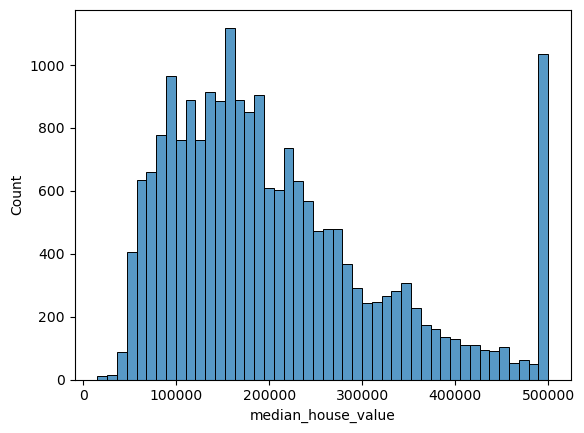

In [163]:
sns.histplot(df_1.median_house_value) #Hist based on median_house_value the variable that we have to predict

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

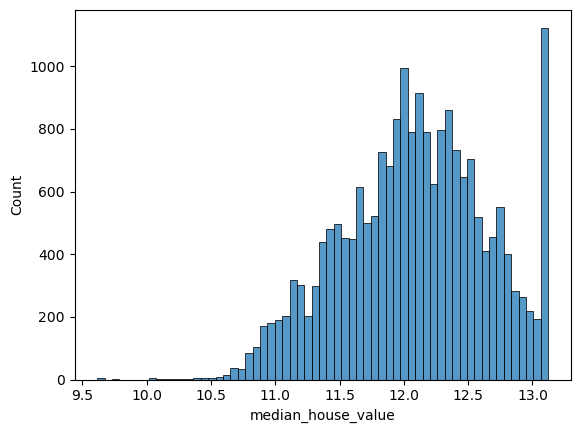

In [164]:
#Normalization of the prices with LOG

value_logs=np.log1p(df_1.median_house_value)
value_logs
sns.histplot(value_logs)

In [165]:
#QUESTION 1: MISSING VALUES

df_1.isnull().sum() #207 in total_bedrooms

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [166]:
#QUESTION 2: MEDIAN OF POPULATION

np.median(df_1.population) #median of population 1.166

1166.0

In [167]:
#SPLIT THE DATA

n = len(df_1)

n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test

n_val , n_test, n_train

(4128, 4128, 12384)

In [168]:
#SPLIT THE DATA
#Datasets Idx random SEED 42

idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [169]:
#SPLIT THE DATA
#Dataframes

df_train=df_1.iloc[idx[:n_train]]
df_val=df_1.iloc[idx[n_train:n_train+n_val]]
df_test=df_1.iloc[idx[n_train+n_val:]]


In [170]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [171]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [172]:
df_val.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-120.85,37.51,15.0,1131.0,285.0,728.0,281.0,1.5531,93100.0
1,-118.25,34.09,52.0,1866.0,470.0,1211.0,417.0,2.9350,189400.0
2,-122.02,37.31,34.0,2629.0,433.0,1301.0,431.0,6.0830,341400.0
3,-121.88,37.30,16.0,2692.0,749.0,1674.0,681.0,2.6763,191100.0
4,-122.27,37.56,17.0,3211.0,847.0,1553.0,812.0,4.9434,292100.0


In [173]:
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-120.26,37.13,33.0,1239.0,250.0,648.0,227.0,2.0278,58800.0
1,-117.91,33.86,26.0,2296.0,570.0,1415.0,527.0,2.4732,165800.0
2,-118.36,34.04,48.0,1769.0,429.0,993.0,405.0,2.3214,139400.0
3,-118.15,34.69,32.0,1300.0,234.0,712.0,249.0,3.2500,107500.0
4,-119.97,38.93,24.0,856.0,185.0,388.0,108.0,3.1806,107200.0


In [174]:
#Log price

y_train=np.log1p(df_train.median_house_value.values)
y_val=np.log1p(df_val.median_house_value.values)
y_test=np.log1p(df_test.median_house_value.values)

In [175]:
#Target value ('median_house_value') is not in your dataframe

del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

In [176]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250


In [177]:
df_val.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-120.85,37.51,15.0,1131.0,285.0,728.0,281.0,1.5531
1,-118.25,34.09,52.0,1866.0,470.0,1211.0,417.0,2.9350
2,-122.02,37.31,34.0,2629.0,433.0,1301.0,431.0,6.0830
3,-121.88,37.30,16.0,2692.0,749.0,1674.0,681.0,2.6763
4,-122.27,37.56,17.0,3211.0,847.0,1553.0,812.0,4.9434


In [178]:
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-120.26,37.13,33.0,1239.0,250.0,648.0,227.0,2.0278
1,-117.91,33.86,26.0,2296.0,570.0,1415.0,527.0,2.4732
2,-118.36,34.04,48.0,1769.0,429.0,993.0,405.0,2.3214
3,-118.15,34.69,32.0,1300.0,234.0,712.0,249.0,3.2500
4,-119.97,38.93,24.0,856.0,185.0,388.0,108.0,3.1806


In [179]:
y_train

array([10.77270764, 10.7320612 , 13.12236738, ..., 11.89683321,
       11.93032573, 12.9487264 ])

In [180]:
y_val

array([11.4414402 , 12.15162174, 12.74081302, ..., 11.87965667,
       11.9492495 , 11.97540713])

In [181]:
y_test

array([10.98191414, 12.01854355, 11.84510995, ..., 12.31088751,
       12.55497093, 12.69158354])

In [182]:
#QUESTION 3:FILL NAN with Zeros or Mean

base=["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]
df_train[base]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250
...,...,...,...,...,...,...,...,...
12379,-117.81,33.88,19.0,2265.0,283.0,904.0,279.0,9.2327
12380,-120.68,35.48,15.0,2608.0,525.0,1351.0,502.0,2.7798
12381,-120.91,38.98,13.0,7689.0,1415.0,3264.0,1198.0,3.6530
12382,-117.72,34.09,36.0,1473.0,328.0,785.0,299.0,3.2566


In [183]:
#Zeros

X_train_zeros=df_train[base].fillna(0).values #extraigo los valores
X_train_zeros

array([[-1.1901e+02,  3.6060e+01,  2.5000e+01, ...,  1.3920e+03,
         3.5900e+02,  1.6812e+00],
       [-1.1946e+02,  3.5140e+01,  3.0000e+01, ...,  1.5650e+03,
         5.8400e+02,  2.5313e+00],
       [-1.2244e+02,  3.7800e+01,  5.2000e+01, ...,  1.3100e+03,
         9.6300e+02,  3.4801e+00],
       ...,
       [-1.2091e+02,  3.8980e+01,  1.3000e+01, ...,  3.2640e+03,
         1.1980e+03,  3.6530e+00],
       [-1.1772e+02,  3.4090e+01,  3.6000e+01, ...,  7.8500e+02,
         2.9900e+02,  3.2566e+00],
       [-1.2247e+02,  3.7760e+01,  3.4000e+01, ...,  1.1520e+03,
         4.4500e+02,  5.1893e+00]])

In [184]:
#Modelo

def train_regresion_lineal(X, y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones, X])    
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

<AxesSubplot:ylabel='Count'>

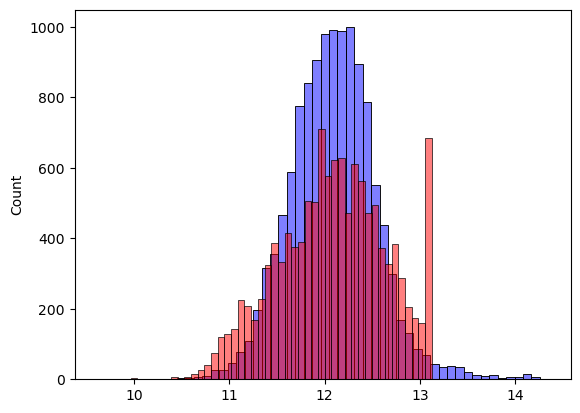

In [185]:
#Regresion Lineal con zeros

train_regresion_lineal(X_train_zeros, y_train)
w0,w=train_regresion_lineal(X_train_zeros, y_train)
w0,w

y_prediction=w0 + X_train_zeros.dot(w)

sns.histplot(y_prediction, color="blue", bins=50, alpha=0.5) #Prediction
sns.histplot(y_train, color="red", bins=50, alpha=0.5) #Target

In [186]:
#RMSE de Zeros

def rmse (y, y_prediction):
    error=y- y_prediction
    se=error**2
    mse=se.mean()
    return np.sqrt(mse)

rmse_zeros=rmse(y_train, y_prediction)
rmse_zeros

0.3413135910156675

In [187]:
#Fullfill with MEAN

promedio=np.mean(df_train.total_bedrooms)
promedio

533.4803317730147

In [188]:
X_train_mean=df_train[base].fillna(np.mean(df_train.total_bedrooms)).values #extraigo los valores
X_train_mean

array([[-1.1901e+02,  3.6060e+01,  2.5000e+01, ...,  1.3920e+03,
         3.5900e+02,  1.6812e+00],
       [-1.1946e+02,  3.5140e+01,  3.0000e+01, ...,  1.5650e+03,
         5.8400e+02,  2.5313e+00],
       [-1.2244e+02,  3.7800e+01,  5.2000e+01, ...,  1.3100e+03,
         9.6300e+02,  3.4801e+00],
       ...,
       [-1.2091e+02,  3.8980e+01,  1.3000e+01, ...,  3.2640e+03,
         1.1980e+03,  3.6530e+00],
       [-1.1772e+02,  3.4090e+01,  3.6000e+01, ...,  7.8500e+02,
         2.9900e+02,  3.2566e+00],
       [-1.2247e+02,  3.7760e+01,  3.4000e+01, ...,  1.1520e+03,
         4.4500e+02,  5.1893e+00]])

<AxesSubplot:ylabel='Count'>

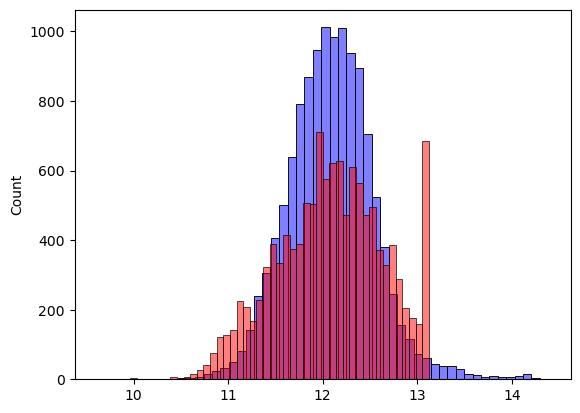

In [189]:
#Regresion Lineal con mean

train_regresion_lineal(X_train_mean, y_train)
w0,w=train_regresion_lineal(X_train_mean, y_train)
w0,w

y_prediction_mean=w0 + X_train_mean.dot(w)

sns.histplot(y_prediction_mean, color="blue", bins=50, alpha=0.5) #Prediction with means
sns.histplot(y_train, color="red", bins=50, alpha=0.5) #Target

<AxesSubplot:ylabel='Count'>

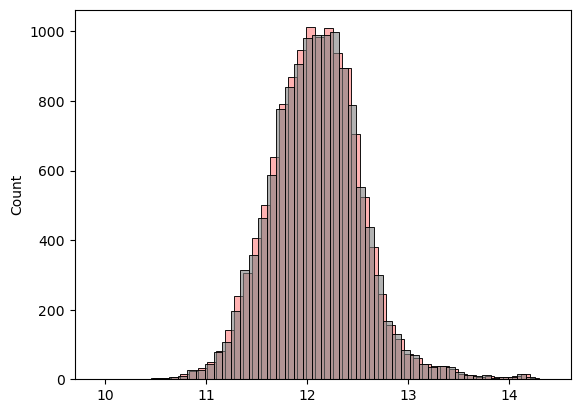

In [190]:
sns.histplot(y_prediction_mean, color="red", bins=50, alpha=0.3) #Prediction with means
sns.histplot(y_prediction, color="gray", bins=50, alpha=0.6) #Prediction with zeros

In [191]:
#RMSE de memans

def rmse (y, y_prediction):
    error=y- y_prediction
    se=error**2
    mse=se.mean()
    return np.sqrt(mse)

rmse_means=rmse(y_train, y_prediction_mean)
rmse_means=round(rmse_means, 2)
rmse_means

rmse_zeros=round(rmse_zeros, 2)
rmse_zeros

rmse_zeros==rmse_means #ambas son buenos / Both are good.


True

In [192]:
#Question 4

#Regularizado

def prepare_X(df):
    df_num = df[base]
    df_num=df_num.fillna(0)
    X=df_num.values
    return X

def train_regresion_lineal_reg(X, y, r):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones, X])
    
    XTX=X.T.dot(X)
    XTX=XTX+r*np.eye(XTX.shape[0])
    
    XTX_inv=np.linalg.inv(XTX)
    
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

prepare_X(df_train)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train=prepare_X(df_train)
    w0,w=train_regresion_lineal_reg(X_train, y_train, r=r)
    
    X_val= prepare_X(df_val)
    y_pred=w0 + X_val.dot(w)
    score=rmse(y_val, y_pred)
    score=round(score,6)
    
    print(r, w0, score)
    
    #El mejor resultado es 0.01 con un RMSE de 0.573698 y un W0 de 11.2780

0 -11.686975241970226 0.329533
1e-06 -11.686959175950335 0.329533
0.0001 -11.68536886556655 0.329533
0.001 -11.670931318286257 0.329533
0.01 -11.528493586076086 0.329532
0.1 -10.274500282121712 0.329695
1 -4.920480897796898 0.333789
5 -1.482095745685135 0.339249
10 -0.7899311832050503 0.340606


In [202]:
#Question 5

#SPLIT THE DATA

n = len(df_1)

n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test

n_val , n_test, n_train

#Datasets Idx random SEED

idx=np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
idx

#Dataframes

df_train=df_1.iloc[idx[:n_train]]
df_val=df_1.iloc[idx[n_train:n_train+n_val]]
df_test=df_1.iloc[idx[n_train+n_val:]]

df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

X_train_zeros=df_train[base].fillna(0).values #extraigo los valores
X_train_zeros

#Modelo

def train_regresion_lineal(X, y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones, X])    
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

#Regresion Lineal con zeros
train_regresion_lineal(X_train_zeros, y_train)
w0,w=train_regresion_lineal(X_train_zeros, y_train)
w0,w

y_prediction=w0 + X_train_zeros.dot(w)

def rmse (y, y_prediction):
    error=y- y_prediction
    se=error**2
    mse=se.mean()
    return np.sqrt(mse)

rmse_zeros_9=rmse(y_train, y_prediction)
rmse_zeros_9


0.5671403234773914

In [203]:
rmse_array=np.array([rmse_zeros_0, rmse_zeros_1, rmse_zeros_2, rmse_zeros_3, rmse_zeros_4, rmse_zeros_5, 
                     rmse_zeros_6, rmse_zeros_7,
                     rmse_zeros_8, rmse_zeros_9])

rmse_array

array([0.56690336, 0.5670555 , 0.56702196, 0.56703702, 0.56669237,
       0.56717757, 0.56686093, 0.56700991, 0.56712711, 0.56714032])

In [204]:
#Std collect

std=np.std(rmse_array)

std # result = 0,000139 = 0,00014 = 0.00005


0.00013987773686115714

In [205]:
std=round(std,3)
std

0.0

In [206]:
#Question 6

#SPLIT THE DATA

n = len(df_1)

n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test

n_val , n_test, n_train

(4128, 4128, 12384)

In [207]:
#Datasets Idx random SEED

idx=np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
idx

array([20558, 11430,  2656, ...,  5014,  9979,   501])

In [208]:
#Dataframes

df_train=df_1.iloc[idx[:n_train]]
df_val=df_1.iloc[idx[n_train:n_train+n_val]]
df_test=df_1.iloc[idx[n_train+n_val:]]

df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [209]:
#Log price

y_train=np.log1p(df_train.median_house_value.values)
y_val=np.log1p(df_val.median_house_value.values)
y_test=np.log1p(df_test.median_house_value.values)

#Target value ('median_house_value') is not in your dataframe

del df_train["median_house_value"]
del df_val["median_house_value"]
del df_test["median_house_value"]

df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.80,38.67,10.0,2086.0,380.0,1073.0,378.0,4.5526
1,-117.97,33.66,22.0,3914.0,600.0,1871.0,607.0,5.8541
2,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417
3,-117.11,32.69,37.0,2395.0,627.0,2489.0,599.0,1.5933
4,-118.37,34.21,36.0,1392.0,326.0,1181.0,303.0,3.1563
...,...,...,...,...,...,...,...,...
12379,-117.14,32.71,52.0,500.0,NaN,480.0,108.0,1.8696
12380,-118.35,33.91,19.0,1949.0,559.0,1282.0,498.0,2.7813
12381,-118.46,34.29,24.0,3668.0,890.0,3151.0,810.0,3.0526
12382,-118.13,33.83,44.0,1710.0,333.0,786.0,344.0,4.2917


In [210]:
df_full_train=pd.concat([df_train, df_val])
df_full_train

df_full_train=df_full_train.reset_index(drop=True)
df_full_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.80,38.67,10.0,2086.0,380.0,1073.0,378.0,4.5526
1,-117.97,33.66,22.0,3914.0,600.0,1871.0,607.0,5.8541
2,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417
3,-117.11,32.69,37.0,2395.0,627.0,2489.0,599.0,1.5933
4,-118.37,34.21,36.0,1392.0,326.0,1181.0,303.0,3.1563
...,...,...,...,...,...,...,...,...
16507,-122.30,38.31,34.0,1797.0,395.0,1162.0,407.0,3.4550
16508,-118.54,34.27,28.0,2309.0,300.0,931.0,302.0,6.7415
16509,-118.13,33.93,34.0,2122.0,517.0,1578.0,488.0,3.1496
16510,-118.37,34.11,42.0,5518.0,979.0,1863.0,957.0,8.5842


In [211]:
y_full_train=np.concatenate([y_train, y_val])
y_full_train

array([11.94730839, 12.54789128, 11.23981668, ..., 12.16473489,
       13.12236738, 12.9567833 ])

In [212]:
df_full_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
dtype: int64

In [213]:
base=["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]
df_train[base]

#Zeros

X_train_zeros_full=df_full_train[base].fillna(0).values #extraigo los valores
X_train_zeros_full

array([[-121.8   ,   38.67  ,   10.    , ..., 1073.    ,  378.    ,
           4.5526],
       [-117.97  ,   33.66  ,   22.    , ..., 1871.    ,  607.    ,
           5.8541],
       [-124.25  ,   40.28  ,   32.    , ...,  434.    ,  187.    ,
           1.9417],
       ...,
       [-118.13  ,   33.93  ,   34.    , ..., 1578.    ,  488.    ,
           3.1496],
       [-118.37  ,   34.11  ,   42.    , ..., 1863.    ,  957.    ,
           8.5842],
       [-118.37  ,   34.08  ,   52.    , ...,  543.    ,  213.    ,
           6.0338]])

In [224]:
#Modelo

def prepare_X(df):
    df_num = df[base]
    df_num=df_num.fillna(0)
    X=df_num.values
    return X

def train_regresion_lineal_reg(X, y, r):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones, X])
    
    XTX=X.T.dot(X)
    XTX=XTX+r*np.eye(XTX.shape[0])
    
    XTX_inv=np.linalg.inv(XTX)
    
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

prepare_X(df_full_train)

w0,w=train_regresion_lineal_reg(X_train_zeros_full, y_full_train, r=0.001)
w0, w

X_test= prepare_X(df_test)
y_pred=w0 + X_test.dot(w)

score=rmse(y_test, y_pred)

score=round(score,2)

score #0,35


0.35